# Load the libraries

In [1]:
library(data.table)
library(tidyverse)

-- Attaching core tidyverse packages ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse 2.0.0 --
v dplyr     1.1.0     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.0
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::between()     masks data.table::between()
x dplyr::filter()      masks stats::filter()
x dplyr::first()       masks data.table::first()
x lubridate::hour()    masks data.table::hour()
x lubridate::isoweek() masks data.table::isoweek()
x dplyr::lag()         masks stats::lag()
x dplyr::last()        masks data.table::last()
x lubridate::mday()

# Load the data

In [2]:
nseqs <- 11609119

In [3]:
DF1 <- readRDS("/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/rds_files/DF1.unique.mutated.rds")
DF1

collection_date,aa_subs,accession_id,location,region,mutation_name,ref,pos,alt
<date>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<int>,<chr>
2019-12-24,NSP4_F145I,EPI_ISL_402123,Asia / China / Hubei / Wuhan,NSP4,F145I,F,145,I
2019-12-24,NSP3_N1890S,EPI_ISL_402123,Asia / China / Hubei / Wuhan,NSP3,N1890S,N,1890,S
2019-12-26,NSP6_N264K,EPI_ISL_406798,Asia / China / Hubei / Wuhan,NSP6,N264K,N,264,K
2019-12-26,NSP3_L1417I,EPI_ISL_406798,Asia / China / Hubei / Wuhan,NSP3,L1417I,L,1417,I
2019-12-30,NSP16_K160R,EPI_ISL_402128,Asia / China / Hubei / Wuhan,NSP16,K160R,K,160,R
2019-12-30,NSP3_G1433S,EPI_ISL_402128,Asia / China / Hubei / Wuhan,NSP3,G1433S,G,1433,S
2019-12-30,NSP3_I1426T,EPI_ISL_403930,Asia / China / Hubei / Wuhan,NSP3,I1426T,I,1426,T
2019-12-30,Spike_F32I,EPI_ISL_402132,Asia / China / Hubei / Wuhan,Spike,F32I,F,32,I
2019-12-30,NSP3_S743P,EPI_ISL_529213,Asia / China / Hubei / Wuhan,NSP3,S743P,S,743,P


In [5]:
DF1.collectionDate <- select(DF1, c("collection_date", "aa_subs", "accession_id", "location")) %>%
                        column_to_rownames(var = "aa_subs")
DF1.collectionDate

,collection_date,accession_id,location
,<date>,<chr>,<fct>
NSP4_F145I,2019-12-24,EPI_ISL_402123,Asia / China / Hubei / Wuhan
NSP3_N1890S,2019-12-24,EPI_ISL_402123,Asia / China / Hubei / Wuhan
NSP6_N264K,2019-12-26,EPI_ISL_406798,Asia / China / Hubei / Wuhan
NSP3_L1417I,2019-12-26,EPI_ISL_406798,Asia / China / Hubei / Wuhan
NSP16_K160R,2019-12-30,EPI_ISL_402128,Asia / China / Hubei / Wuhan
NSP3_G1433S,2019-12-30,EPI_ISL_402128,Asia / China / Hubei / Wuhan
NSP3_I1426T,2019-12-30,EPI_ISL_403930,Asia / China / Hubei / Wuhan
Spike_F32I,2019-12-30,EPI_ISL_402132,Asia / China / Hubei / Wuhan
NSP3_S743P,2019-12-30,EPI_ISL_529213,Asia / China / Hubei / Wuhan


In [6]:
DF2 <- readRDS("/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/rds_files/DF2.mutated.rds")
DF2

aa_subs,counts,region,mutation_name,fraction,per_abundance,ref,pos,alt
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>
Spike_D614G,11551573,Spike,D614G,0.9950430,99.50430,D,614,G
NSP12_P323L,11513173,NSP12,P323L,0.9917353,99.17353,P,323,L
Spike_T478K,9024745,Spike,T478K,0.7773841,77.73841,T,478,K
NSP4_T492I,8993496,NSP4,T492I,0.7746924,77.46924,T,492,I
Spike_G142D,7847034,Spike,G142D,0.6759371,67.59371,G,142,D
N_R203K,6758704,N,R203K,0.5821892,58.21892,R,203,K
N_G204R,6691624,N,G204R,0.5764110,57.64110,G,204,R
Spike_P681H,6555302,Spike,P681H,0.5646683,56.46683,P,681,H
NSP6_G107del,6507129,NSP6,G107del,0.5605188,56.05188,G,107,del


In [7]:
column_to_rownames(.data = DF2, var = "aa_subs")

,counts,region,mutation_name,fraction,per_abundance,ref,pos,alt
,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>
Spike_D614G,11551573,Spike,D614G,0.9950430,99.50430,D,614,G
NSP12_P323L,11513173,NSP12,P323L,0.9917353,99.17353,P,323,L
Spike_T478K,9024745,Spike,T478K,0.7773841,77.73841,T,478,K
NSP4_T492I,8993496,NSP4,T492I,0.7746924,77.46924,T,492,I
Spike_G142D,7847034,Spike,G142D,0.6759371,67.59371,G,142,D
N_R203K,6758704,N,R203K,0.5821892,58.21892,R,203,K
N_G204R,6691624,N,G204R,0.5764110,57.64110,G,204,R
Spike_P681H,6555302,Spike,P681H,0.5646683,56.46683,P,681,H
NSP6_G107del,6507129,NSP6,G107del,0.5605188,56.05188,G,107,del


## Master dataframe

In [8]:
DF <- merge(DF1.collectionDate, DF2, by.x = 0, by.y = "aa_subs", all.x = TRUE) %>% 
        rename("aa_subs" = "Row.names")
rownames(DF) <- DF$aa_subs
DF

# # this doesn't work as intended
# DF <- bind_cols(DF1.collectionDate, column_to_rownames(.data = DF2, var = "aa_subs"))

,aa_subs,collection_date,accession_id,location,counts,region,mutation_name,fraction,per_abundance,ref,pos,alt
,<I<chr>>,<date>,<chr>,<fct>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>
E_A22C,E_A22C,2020-07-13,EPI_ISL_5074736,North America / USA / Texas / Houston,71,E,A22C,6.115882e-06,6.115882e-04,A,22,C
E_A22D,E_A22D,2022-01-05,EPI_ISL_12152753,Europe / Russia / Moscow region,1,E,A22D,8.613918e-08,8.613918e-06,A,22,D
E_A22F,E_A22F,2021-11-24,EPI_ISL_7944977,North America / USA / Massachusetts,3,E,A22F,2.584175e-07,2.584175e-05,A,22,F
E_A22G,E_A22G,2020-12-23,EPI_ISL_15038492,Asia / India / Jammu and Kashmir,3,E,A22G,2.584175e-07,2.584175e-05,A,22,G
E_A22L,E_A22L,2021-10-15,EPI_ISL_17048282,North America / USA / Texas / El Paso,2,E,A22L,1.722784e-07,1.722784e-05,A,22,L
E_A22P,E_A22P,2021-01-21,EPI_ISL_1080888,North America / USA / Texas / Houston,2,E,A22P,1.722784e-07,1.722784e-05,A,22,P
E_A22S,E_A22S,2020-03-28,EPI_ISL_424606,Europe / Iceland / Reykjavik,181,E,A22S,1.559119e-05,1.559119e-03,A,22,S
E_A22T,E_A22T,2020-08-11,EPI_ISL_1373690,North America / USA / Pennsylvania / Allegheny County / Pittsburgh,38,E,A22T,3.273289e-06,3.273289e-04,A,22,T
E_A22V,E_A22V,2020-06-19,EPI_ISL_1168261,North America / USA / Texas / Starr,358,E,A22V,3.083783e-05,3.083783e-03,A,22,V


In [9]:
DF$region <- factor(DF$region)
DF

,aa_subs,collection_date,accession_id,location,counts,region,mutation_name,fraction,per_abundance,ref,pos,alt
,<I<chr>>,<date>,<chr>,<fct>,<int>,<fct>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>
E_A22C,E_A22C,2020-07-13,EPI_ISL_5074736,North America / USA / Texas / Houston,71,E,A22C,6.115882e-06,6.115882e-04,A,22,C
E_A22D,E_A22D,2022-01-05,EPI_ISL_12152753,Europe / Russia / Moscow region,1,E,A22D,8.613918e-08,8.613918e-06,A,22,D
E_A22F,E_A22F,2021-11-24,EPI_ISL_7944977,North America / USA / Massachusetts,3,E,A22F,2.584175e-07,2.584175e-05,A,22,F
E_A22G,E_A22G,2020-12-23,EPI_ISL_15038492,Asia / India / Jammu and Kashmir,3,E,A22G,2.584175e-07,2.584175e-05,A,22,G
E_A22L,E_A22L,2021-10-15,EPI_ISL_17048282,North America / USA / Texas / El Paso,2,E,A22L,1.722784e-07,1.722784e-05,A,22,L
E_A22P,E_A22P,2021-01-21,EPI_ISL_1080888,North America / USA / Texas / Houston,2,E,A22P,1.722784e-07,1.722784e-05,A,22,P
E_A22S,E_A22S,2020-03-28,EPI_ISL_424606,Europe / Iceland / Reykjavik,181,E,A22S,1.559119e-05,1.559119e-03,A,22,S
E_A22T,E_A22T,2020-08-11,EPI_ISL_1373690,North America / USA / Pennsylvania / Allegheny County / Pittsburgh,38,E,A22T,3.273289e-06,3.273289e-04,A,22,T
E_A22V,E_A22V,2020-06-19,EPI_ISL_1168261,North America / USA / Texas / Starr,358,E,A22V,3.083783e-05,3.083783e-03,A,22,V


In [10]:
DF <- DF |> 
    mutate(
        location = gsub(" / ", "/", location), # Remove spaces around slashes
        location = gsub("^/|/$", "", location), # Remove leading and trailing slashes
        location_parts = strsplit(location, "/"), # Split the location string
        continent = sapply(location_parts, function(x) ifelse(length(x) >= 1, x[1], NA)),
        country = sapply(location_parts, function(x) ifelse(length(x) >= 2, x[2], NA)),
        state = sapply(location_parts, function(x) ifelse(length(x) >= 3, x[3], NA)),
        city = sapply(location_parts, function(x) ifelse(length(x) >= 4, x[4], NA))
    ) |>
    select(-location_parts)
DF

,aa_subs,collection_date,accession_id,location,counts,region,mutation_name,fraction,per_abundance,ref,pos,alt,continent,country,state,city
,<I<chr>>,<date>,<chr>,<chr>,<int>,<fct>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
E_A22C,E_A22C,2020-07-13,EPI_ISL_5074736,North America/USA/Texas/Houston,71,E,A22C,6.115882e-06,6.115882e-04,A,22,C,North America,USA,Texas,Houston
E_A22D,E_A22D,2022-01-05,EPI_ISL_12152753,Europe/Russia/Moscow region,1,E,A22D,8.613918e-08,8.613918e-06,A,22,D,Europe,Russia,Moscow region,NA
E_A22F,E_A22F,2021-11-24,EPI_ISL_7944977,North America/USA/Massachusetts,3,E,A22F,2.584175e-07,2.584175e-05,A,22,F,North America,USA,Massachusetts,NA
E_A22G,E_A22G,2020-12-23,EPI_ISL_15038492,Asia/India/Jammu and Kashmir,3,E,A22G,2.584175e-07,2.584175e-05,A,22,G,Asia,India,Jammu and Kashmir,NA
E_A22L,E_A22L,2021-10-15,EPI_ISL_17048282,North America/USA/Texas/El Paso,2,E,A22L,1.722784e-07,1.722784e-05,A,22,L,North America,USA,Texas,El Paso
E_A22P,E_A22P,2021-01-21,EPI_ISL_1080888,North America/USA/Texas/Houston,2,E,A22P,1.722784e-07,1.722784e-05,A,22,P,North America,USA,Texas,Houston
E_A22S,E_A22S,2020-03-28,EPI_ISL_424606,Europe/Iceland/Reykjavik,181,E,A22S,1.559119e-05,1.559119e-03,A,22,S,Europe,Iceland,Reykjavik,NA
E_A22T,E_A22T,2020-08-11,EPI_ISL_1373690,North America/USA/Pennsylvania/Allegheny County/Pittsburgh,38,E,A22T,3.273289e-06,3.273289e-04,A,22,T,North America,USA,Pennsylvania,Allegheny County
E_A22V,E_A22V,2020-06-19,EPI_ISL_1168261,North America/USA/Texas/Starr,358,E,A22V,3.083783e-05,3.083783e-03,A,22,V,North America,USA,Texas,Starr


In [11]:
print("Started saving DF...")
saveRDS(DF, "./r_analysis/rds_files/DF.rds")
write.csv(DF, "./r_analysis/csv_files/DF.csv")
print("DF saved successfully!")

[1] "Started saving DF..."
[1] "DF saved successfully!"


## Splitting master dataframe into substitutions and indels

In [12]:
DF.subs <- DF %>% 
            filter(ref != "ins") %>%
            filter(alt != "del")
DF.del <- filter(DF, alt == "del")
DF.ins <- filter(DF, ref == "ins")

nrow(DF) == (nrow(DF.subs) + nrow(DF.del) + nrow(DF.ins))

[1] TRUE

In [13]:
DF.subs

,aa_subs,collection_date,accession_id,location,counts,region,mutation_name,fraction,per_abundance,ref,pos,alt,continent,country,state,city
,<I<chr>>,<date>,<chr>,<chr>,<int>,<fct>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
E_A22C,E_A22C,2020-07-13,EPI_ISL_5074736,North America/USA/Texas/Houston,71,E,A22C,6.115882e-06,6.115882e-04,A,22,C,North America,USA,Texas,Houston
E_A22D,E_A22D,2022-01-05,EPI_ISL_12152753,Europe/Russia/Moscow region,1,E,A22D,8.613918e-08,8.613918e-06,A,22,D,Europe,Russia,Moscow region,NA
E_A22F,E_A22F,2021-11-24,EPI_ISL_7944977,North America/USA/Massachusetts,3,E,A22F,2.584175e-07,2.584175e-05,A,22,F,North America,USA,Massachusetts,NA
E_A22G,E_A22G,2020-12-23,EPI_ISL_15038492,Asia/India/Jammu and Kashmir,3,E,A22G,2.584175e-07,2.584175e-05,A,22,G,Asia,India,Jammu and Kashmir,NA
E_A22L,E_A22L,2021-10-15,EPI_ISL_17048282,North America/USA/Texas/El Paso,2,E,A22L,1.722784e-07,1.722784e-05,A,22,L,North America,USA,Texas,El Paso
E_A22P,E_A22P,2021-01-21,EPI_ISL_1080888,North America/USA/Texas/Houston,2,E,A22P,1.722784e-07,1.722784e-05,A,22,P,North America,USA,Texas,Houston
E_A22S,E_A22S,2020-03-28,EPI_ISL_424606,Europe/Iceland/Reykjavik,181,E,A22S,1.559119e-05,1.559119e-03,A,22,S,Europe,Iceland,Reykjavik,NA
E_A22T,E_A22T,2020-08-11,EPI_ISL_1373690,North America/USA/Pennsylvania/Allegheny County/Pittsburgh,38,E,A22T,3.273289e-06,3.273289e-04,A,22,T,North America,USA,Pennsylvania,Allegheny County
E_A22V,E_A22V,2020-06-19,EPI_ISL_1168261,North America/USA/Texas/Starr,358,E,A22V,3.083783e-05,3.083783e-03,A,22,V,North America,USA,Texas,Starr


In [14]:
DF.subs

,aa_subs,collection_date,accession_id,location,counts,region,mutation_name,fraction,per_abundance,ref,pos,alt,continent,country,state,city
,<I<chr>>,<date>,<chr>,<chr>,<int>,<fct>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
E_A22C,E_A22C,2020-07-13,EPI_ISL_5074736,North America/USA/Texas/Houston,71,E,A22C,6.115882e-06,6.115882e-04,A,22,C,North America,USA,Texas,Houston
E_A22D,E_A22D,2022-01-05,EPI_ISL_12152753,Europe/Russia/Moscow region,1,E,A22D,8.613918e-08,8.613918e-06,A,22,D,Europe,Russia,Moscow region,NA
E_A22F,E_A22F,2021-11-24,EPI_ISL_7944977,North America/USA/Massachusetts,3,E,A22F,2.584175e-07,2.584175e-05,A,22,F,North America,USA,Massachusetts,NA
E_A22G,E_A22G,2020-12-23,EPI_ISL_15038492,Asia/India/Jammu and Kashmir,3,E,A22G,2.584175e-07,2.584175e-05,A,22,G,Asia,India,Jammu and Kashmir,NA
E_A22L,E_A22L,2021-10-15,EPI_ISL_17048282,North America/USA/Texas/El Paso,2,E,A22L,1.722784e-07,1.722784e-05,A,22,L,North America,USA,Texas,El Paso
E_A22P,E_A22P,2021-01-21,EPI_ISL_1080888,North America/USA/Texas/Houston,2,E,A22P,1.722784e-07,1.722784e-05,A,22,P,North America,USA,Texas,Houston
E_A22S,E_A22S,2020-03-28,EPI_ISL_424606,Europe/Iceland/Reykjavik,181,E,A22S,1.559119e-05,1.559119e-03,A,22,S,Europe,Iceland,Reykjavik,NA
E_A22T,E_A22T,2020-08-11,EPI_ISL_1373690,North America/USA/Pennsylvania/Allegheny County/Pittsburgh,38,E,A22T,3.273289e-06,3.273289e-04,A,22,T,North America,USA,Pennsylvania,Allegheny County
E_A22V,E_A22V,2020-06-19,EPI_ISL_1168261,North America/USA/Texas/Starr,358,E,A22V,3.083783e-05,3.083783e-03,A,22,V,North America,USA,Texas,Starr


## Subsetting dataframes based on per_abundance (>= 0.01%, >= 0.1%, >= 1%)

In [15]:
# Substitutions
DF.subs.geqpt01 <- filter(DF.subs, per_abundance >= 0.01)
dim(DF.subs.geqpt01)

DF.subs.geqpt1 <- filter(DF.subs, per_abundance >= 0.1)
dim(DF.subs.geqpt1)

DF.subs.geq1 <- filter(DF.subs, per_abundance >= 1)
dim(DF.subs.geq1)

DF.subs.top100 <- DF.subs %>%
  arrange(desc(per_abundance)) %>%
  slice(1:100)
dim(DF.subs.top100)

# Saving dataframes
write.csv(DF.subs.geqpt01, "/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.subs.geqpt01.csv")
write.csv(DF.subs.geqpt1, "/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.subs.geqpt1.csv")
write.csv(DF.subs.geq1, "/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.subs.geq1.csv")
write.csv(DF.subs.top100, "/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.subs.top100.csv")

[1] 5211   16

[1] 851  16

[1] 190  16

[1] 100  16

In [16]:
# Insertions
DF.ins.geqpt01 <- filter(DF.ins, per_abundance >= 0.01)
dim(DF.ins.geqpt01)

DF.ins.geqpt1 <- filter(DF.ins, per_abundance >= 0.1)
dim(DF.ins.geqpt1)

DF.ins.geq1 <- filter(DF.ins, per_abundance >= 1)
dim(DF.ins.geq1)

DF.ins.top100 <- DF.ins %>%
  arrange(desc(per_abundance)) %>%
  slice(1:100)
dim(DF.ins.top100)

# Saving dataframes
write.csv(DF.ins.geqpt01, "/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.ins.geqpt01.csv")
write.csv(DF.ins.geqpt1, "/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.ins.geqpt1.csv")
write.csv(DF.ins.geq1, "/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.ins.geq1.csv")
write.csv(DF.ins.top100, "/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.ins.top100.csv")

[1] 25 16

[1]  3 16

[1]  1 16

[1] 100  16

In [17]:
# Deletions
DF.del.geqpt01 <- filter(DF.del, per_abundance >= 0.01)
dim(DF.del.geqpt01)

DF.del.geqpt1 <- filter(DF.del, per_abundance >= 0.1)
dim(DF.del.geqpt1)

DF.del.geq1 <- filter(DF.del, per_abundance >= 1)
dim(DF.del.geq1)

DF.del.top100 <- DF.del %>%
  arrange(desc(per_abundance)) %>%
  slice(1:100)
dim(DF.del.top100)

# Saving dataframes
write.csv(DF.del.geqpt01, "/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.del.geqpt01.csv")
write.csv(DF.del.geqpt1, "/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.del.geqpt1.csv")
write.csv(DF.del.geq1, "/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.del.geq1.csv")
write.csv(DF.del.top100, "/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.del.top100.csv")

[1] 216  16

[1] 49 16

[1] 28 16

[1] 100  16

# Plotting

## Scatter plot: collection_date vs per_abundance

### scatter AA

In [2]:
DF.subs.geqpt01 <- read_csv("/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.subs.geqpt01.csv") |> 
    select(-"...1")
DF.subs.geqpt01

DF.subs.top100 <- read_csv("/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.subs.top100.csv") |> 
    select(-"...1")
DF.subs.top100

DF.aa.subs.geqpt01 <- read_csv("/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.subs.geqpt01.csv") |> 
    select(-"...1")
DF.aa.subs.geqpt01

DF.aa.subs.top100 <- read_csv("/ahg/regevdata/projects/ICA_Lung/Akhil/projects/prev/mutation_tracking/r_analysis/csv_files/DF.subs.top100.csv") |> 
    select(-"...1")
DF.aa.subs.top100

New names:
* `` -> `...1`
Rows: 5211 Columns: 17
-- Column specification ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (12): ...1, aa_subs, accession_id, location, region, mutation_name, ref...
dbl   (4): counts, fraction, per_abundance, pos
date  (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


aa_subs,collection_date,accession_id,location,counts,region,mutation_name,fraction,per_abundance,ref,pos,alt,continent,country,state,city
<chr>,<date>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
E_A41V,2020-04-07,EPI_ISL_442779,Europe/United Kingdom/England,2426,E,A41V,0.0002089737,0.02089737,A,41,V,Europe,United Kingdom,England,NA
E_D72G,2020-03-06,EPI_ISL_644684,Europe/France/Occitanie/Montpellier,15706,E,D72G,0.0013529020,0.13529020,D,72,G,Europe,France,Occitanie,Montpellier
E_F26L,2020-04-04,EPI_ISL_450174,North America/USA/Louisiana/New Orleans,1278,E,F26L,0.0001100859,0.01100859,F,26,L,North America,USA,Louisiana,New Orleans
E_L18I,2020-12-28,EPI_ISL_6699035,North America/USA/Nebraska,1782,E,L18I,0.0001535000,0.01535000,L,18,I,North America,USA,Nebraska,NA
E_L21F,2020-03-03,EPI_ISL_542279,Europe/Italy/Lombardy,10281,E,L21F,0.0008855969,0.08855969,L,21,F,Europe,Italy,Lombardy,NA
E_L21V,2020-09-02,EPI_ISL_2321501,North America/USA/Georgia,2052,E,L21V,0.0001767576,0.01767576,L,21,V,North America,USA,Georgia,NA
E_L51I,2020-08-25,EPI_ISL_8904553,Europe/Russia/Saint-Petersburg/Saint-Petersburg,1171,E,L51I,0.0001008690,0.01008690,L,51,I,Europe,Russia,Saint-Petersburg,Saint-Petersburg
E_L73F,2020-03-01,EPI_ISL_2758212,Asia/India,8315,E,L73F,0.0007162473,0.07162473,L,73,F,Asia,India,NA,NA
E_P71L,2020-02-18,EPI_ISL_10980369,Africa/Zambia/Choma/Macha,39114,E,P71L,0.0033692479,0.33692479,P,71,L,Africa,Zambia,Choma,Macha


New names:
* `` -> `...1`
Rows: 100 Columns: 17
-- Column specification ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (12): ...1, aa_subs, accession_id, location, region, mutation_name, ref...
dbl   (4): counts, fraction, per_abundance, pos
date  (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


aa_subs,collection_date,accession_id,location,counts,region,mutation_name,fraction,per_abundance,ref,pos,alt,continent,country,state,city
<chr>,<date>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
Spike_D614G,2020-01-01,EPI_ISL_4405694,South America/Argentina/Buenos Aires/Exaltaci<U+00F3>n de la Cruz,11551573,Spike,D614G,0.9950430,99.50430,D,614,G,South America,Argentina,Buenos Aires,Exaltaci<U+00F3>n de la Cruz
NSP12_P323L,2020-01-01,EPI_ISL_4405694,South America/Argentina/Buenos Aires/Exaltaci<U+00F3>n de la Cruz,11513173,NSP12,P323L,0.9917353,99.17353,P,323,L,South America,Argentina,Buenos Aires,Exaltaci<U+00F3>n de la Cruz
Spike_T478K,2020-03-12,EPI_ISL_6661895,North America/USA/New York/Westchester County,9024745,Spike,T478K,0.7773841,77.73841,T,478,K,North America,USA,New York,Westchester County
NSP4_T492I,2020-01-27,EPI_ISL_17121378,North America/USA/Oklahoma/Oklahoma City,8993496,NSP4,T492I,0.7746924,77.46924,T,492,I,North America,USA,Oklahoma,Oklahoma City
Spike_G142D,2020-03-03,EPI_ISL_2758215,Asia/India,7847034,Spike,G142D,0.6759371,67.59371,G,142,D,Asia,India,NA,NA
N_R203K,2020-01-09,EPI_ISL_2671842,Asia/Japan/Tokyo,6758704,N,R203K,0.5821892,58.21892,R,203,K,Asia,Japan,Tokyo,NA
N_G204R,2020-01-09,EPI_ISL_2671842,Asia/Japan/Tokyo,6691624,N,G204R,0.5764110,57.64110,G,204,R,Asia,Japan,Tokyo,NA
Spike_P681H,2020-01-01,EPI_ISL_3804266,Africa/Niger/Niamey,6555302,Spike,P681H,0.5646683,56.46683,P,681,H,Africa,Niger,Niamey,NA
Spike_N501Y,2020-02-07,EPI_ISL_1603195,Europe/Spain/Castilla y Leon,6279437,Spike,N501Y,0.5409056,54.09056,N,501,Y,Europe,Spain,Castilla y Leon,NA


New names:
* `` -> `...1`
Rows: 5211 Columns: 17
-- Column specification ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (12): ...1, aa_subs, accession_id, location, region, mutation_name, ref...
dbl   (4): counts, fraction, per_abundance, pos
date  (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


aa_subs,collection_date,accession_id,location,counts,region,mutation_name,fraction,per_abundance,ref,pos,alt,continent,country,state,city
<chr>,<date>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
E_A41V,2020-04-07,EPI_ISL_442779,Europe/United Kingdom/England,2426,E,A41V,0.0002089737,0.02089737,A,41,V,Europe,United Kingdom,England,NA
E_D72G,2020-03-06,EPI_ISL_644684,Europe/France/Occitanie/Montpellier,15706,E,D72G,0.0013529020,0.13529020,D,72,G,Europe,France,Occitanie,Montpellier
E_F26L,2020-04-04,EPI_ISL_450174,North America/USA/Louisiana/New Orleans,1278,E,F26L,0.0001100859,0.01100859,F,26,L,North America,USA,Louisiana,New Orleans
E_L18I,2020-12-28,EPI_ISL_6699035,North America/USA/Nebraska,1782,E,L18I,0.0001535000,0.01535000,L,18,I,North America,USA,Nebraska,NA
E_L21F,2020-03-03,EPI_ISL_542279,Europe/Italy/Lombardy,10281,E,L21F,0.0008855969,0.08855969,L,21,F,Europe,Italy,Lombardy,NA
E_L21V,2020-09-02,EPI_ISL_2321501,North America/USA/Georgia,2052,E,L21V,0.0001767576,0.01767576,L,21,V,North America,USA,Georgia,NA
E_L51I,2020-08-25,EPI_ISL_8904553,Europe/Russia/Saint-Petersburg/Saint-Petersburg,1171,E,L51I,0.0001008690,0.01008690,L,51,I,Europe,Russia,Saint-Petersburg,Saint-Petersburg
E_L73F,2020-03-01,EPI_ISL_2758212,Asia/India,8315,E,L73F,0.0007162473,0.07162473,L,73,F,Asia,India,NA,NA
E_P71L,2020-02-18,EPI_ISL_10980369,Africa/Zambia/Choma/Macha,39114,E,P71L,0.0033692479,0.33692479,P,71,L,Africa,Zambia,Choma,Macha


New names:
* `` -> `...1`
Rows: 100 Columns: 17
-- Column specification ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (12): ...1, aa_subs, accession_id, location, region, mutation_name, ref...
dbl   (4): counts, fraction, per_abundance, pos
date  (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


aa_subs,collection_date,accession_id,location,counts,region,mutation_name,fraction,per_abundance,ref,pos,alt,continent,country,state,city
<chr>,<date>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
Spike_D614G,2020-01-01,EPI_ISL_4405694,South America/Argentina/Buenos Aires/Exaltaci<U+00F3>n de la Cruz,11551573,Spike,D614G,0.9950430,99.50430,D,614,G,South America,Argentina,Buenos Aires,Exaltaci<U+00F3>n de la Cruz
NSP12_P323L,2020-01-01,EPI_ISL_4405694,South America/Argentina/Buenos Aires/Exaltaci<U+00F3>n de la Cruz,11513173,NSP12,P323L,0.9917353,99.17353,P,323,L,South America,Argentina,Buenos Aires,Exaltaci<U+00F3>n de la Cruz
Spike_T478K,2020-03-12,EPI_ISL_6661895,North America/USA/New York/Westchester County,9024745,Spike,T478K,0.7773841,77.73841,T,478,K,North America,USA,New York,Westchester County
NSP4_T492I,2020-01-27,EPI_ISL_17121378,North America/USA/Oklahoma/Oklahoma City,8993496,NSP4,T492I,0.7746924,77.46924,T,492,I,North America,USA,Oklahoma,Oklahoma City
Spike_G142D,2020-03-03,EPI_ISL_2758215,Asia/India,7847034,Spike,G142D,0.6759371,67.59371,G,142,D,Asia,India,NA,NA
N_R203K,2020-01-09,EPI_ISL_2671842,Asia/Japan/Tokyo,6758704,N,R203K,0.5821892,58.21892,R,203,K,Asia,Japan,Tokyo,NA
N_G204R,2020-01-09,EPI_ISL_2671842,Asia/Japan/Tokyo,6691624,N,G204R,0.5764110,57.64110,G,204,R,Asia,Japan,Tokyo,NA
Spike_P681H,2020-01-01,EPI_ISL_3804266,Africa/Niger/Niamey,6555302,Spike,P681H,0.5646683,56.46683,P,681,H,Africa,Niger,Niamey,NA
Spike_N501Y,2020-02-07,EPI_ISL_1603195,Europe/Spain/Castilla y Leon,6279437,Spike,N501Y,0.5409056,54.09056,N,501,Y,Europe,Spain,Castilla y Leon,NA


In [3]:
startDate <- as.Date("2019-12-01")
endDate <- as.Date("2023-05-25")

[1] "running..."


[1] "(0.01,0.1]" "(0.1,1]"    "(1,10]"     "(10,100]"

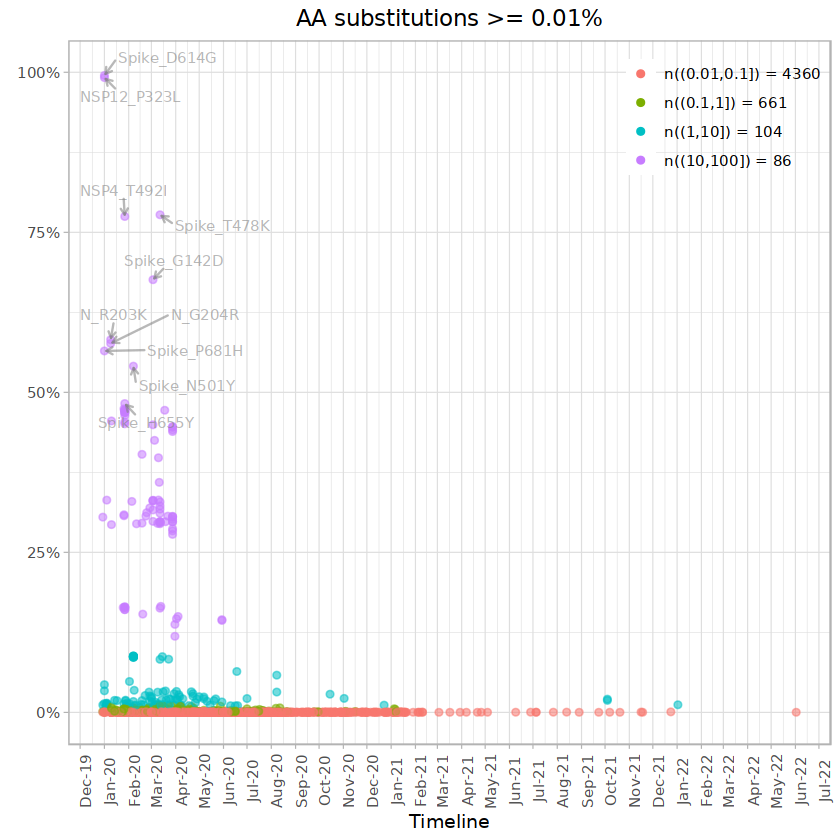

In [6]:
print("running...")
# reference: ggplot2.tidyverse.org/reference/labs.html

plotDF <- DF.aa.subs.geqpt01
plotDF$bins <- cut(x = plotDF$per_abundance, breaks = c(0.01, 0.1, 1, 10, 100))

levels(plotDF$bins)

countDF <- plotDF %>%
    group_by(bins) %>%
    summarise(Count = n())

# A basic scatterplot with color depending on Species
p.scatterAA <- ggplot(plotDF, aes(x = collection_date, y = per_abundance, color = bins, alpha = 0.05)) + 
    geom_point() + # , colour = "black", pch = 21 # , size = 2
    theme_light() +
    ggtitle("AA substitutions >= 0.01%") +
    scale_x_date(breaks = c(seq.Date(as.Date(startDate), as.Date(endDate), by = "1 month")), 
                     date_labels = "%b-%y") +
    # scale_x_date(date_breaks = "1 month", date_labels = "%b-%y") +
    # scale_x_date(date_breaks = "1 month", 
    #              date_labels = "%b %d, %Y",
    #              limits = c(startDate, endDate)) +
    # scale_x_date(date_breaks = "1 week", date_labels =  "%b %d, %Y") +
    theme(axis.text.x = element_text(angle = 90)) +
    ggrepel::geom_text_repel(
        aes(label = aa_subs), 
        data = filter(plotDF, aa_subs %in% head(x = DF.aa.subs.top100$aa_subs, n = 10)),
        # family = "Poppins",
        size = 3,
        min.segment.length = 0, 
        seed = 42, 
        box.padding = 0.5,
        max.overlaps = Inf,
        arrow = arrow(length = unit(0.010, "npc")),
        nudge_x = .15,
        nudge_y = .5,
        color = "grey50"
    ) +
    guides(colour = guide_legend(override.aes = list(alpha = 1)), alpha = "none") +
    scale_color_discrete(breaks = levels(countDF$bins), labels = paste0("n(", countDF$bins, ") = ", countDF$Count)) +
    theme(
        plot.title = element_text(hjust = 0.5),
        legend.position = c(1, 1),
        legend.justification = c("right", "top"),
        legend.box.just = "right",
        legend.title = element_blank(),
        legend.margin = margin(6, 6, 6, 6),
        legend.background = element_rect(fill = "transparent") , #transparent legend bg
#         legend.box.background = element_rect(fill='transparent') #transparent legend panel
    ) +
    labs(x = "Timeline", y = element_blank()) +
    scale_y_continuous(labels = function(x) paste0(x, "%"))
p.scatterAA
                       
# ggsave("./r_analysis/plots/figures/scatterAA.pdf", plot = p.scatterAA, width = 10, height = 4)

### scatter NT

In [7]:
DF.nt.subs.geqpt01 <- read_csv(file = "./Supplementary Files/subs_only/subs_pt01per.csv")
dim(DF.nt.subs.geqpt01)

DF.nt.subs.top100 <- read_csv(file = "./Supplementary Files/subs_only/subs_1per.csv") |>
    top_n(n = 100, wt = per_abundance)
dim(DF.nt.subs.top100)

Rows: 9157 Columns: 10
-- Column specification ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (4): mutation_name, mutation_str, ref, alt
dbl  (5): pos, count_of_seqs, fraction, fraction_corrected, per_abundance
date (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 9157   10

Rows: 281 Columns: 10
-- Column specification ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (4): mutation_name, mutation_str, ref, alt
dbl  (5): pos, count_of_seqs, fraction, fraction_corrected, per_abundance
date (1): collection_date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 100  10

[1] "running..."


[1] "(0.01,0.1]" "(0.1,1]"    "(1,10]"     "(10,100]"

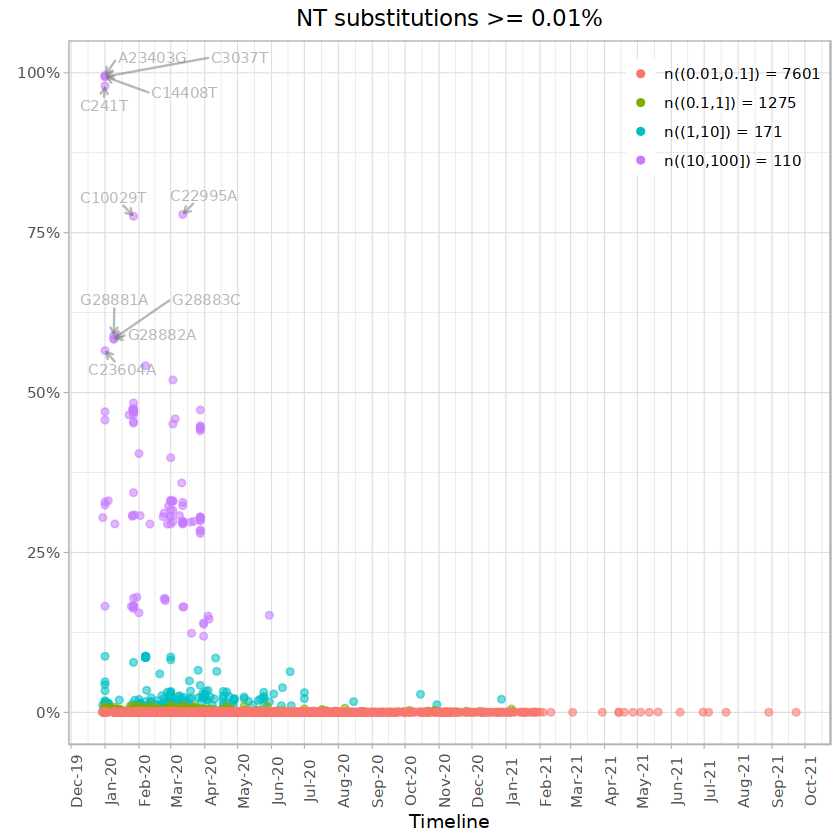

In [8]:
print("running...")
# reference: ggplot2.tidyverse.org/reference/labs.html

plotDF <- DF.nt.subs.geqpt01
plotDF$bins <- cut(x = plotDF$per_abundance, breaks = c(0.01, 0.1, 1, 10, 100))

levels(plotDF$bins)

countDF <- plotDF %>%
    group_by(bins) %>%
    summarise(Count = n())

# A basic scatterplot with color depending on Species
p.scatterNT <- ggplot(plotDF, aes(x = collection_date, y = per_abundance, color = bins, alpha = 0.05)) + 
    geom_point() + # , colour = "black", pch = 21 # , size = 2
    theme_light() +
    ggtitle("NT substitutions >= 0.01%") +
    scale_x_date(breaks = c(seq.Date(as.Date(startDate), as.Date(endDate), by = "1 month")), 
                     date_labels = "%b-%y") +
    # scale_x_date(date_breaks = "1 month", 
    #              date_labels = "%b %d, %Y",
    #              limits = as.Date(c('2019-12-01','2023-05-31'))) +
    # scale_x_date(date_breaks = "1 week", date_labels =  "%b %d, %Y") +
    theme(axis.text.x = element_text(angle = 90)) +
    ggrepel::geom_text_repel(
        aes(label = mutation_name), 
        data = filter(plotDF, mutation_name %in% head(x = DF.nt.subs.top100$mutation_name, n = 10)),
        # family = "Poppins",
        size = 3,
        min.segment.length = 0, 
        seed = 42, 
        box.padding = 0.5,
        max.overlaps = Inf,
        arrow = arrow(length = unit(0.010, "npc")),
        nudge_x = .15,
        nudge_y = .5,
        color = "grey50"
    ) +
    guides(colour = guide_legend(override.aes = list(alpha = 1)), alpha = "none") +
    scale_color_discrete(breaks = levels(countDF$bins), labels = paste0("n(", countDF$bins, ") = ", countDF$Count)) +
    theme(
        plot.title = element_text(hjust = 0.5),
        legend.position = c(1, 1),
        legend.justification = c("right", "top"),
        legend.box.just = "right",
        legend.title = element_blank(),
        legend.margin = margin(6, 6, 6, 6),
        legend.background = element_rect(fill = "transparent") , #transparent legend bg
#         legend.box.background = element_rect(fill='transparent') #transparent legend panel
    ) +
    labs(x = "Timeline", y = element_blank()) +
    scale_y_continuous(labels = function(x) paste0(x, "%"))
p.scatterNT
                       
# ggsave("./r_analysis/plots/figures/scatterNT.pdf", plot = p.scatterNT, width = 10, height = 4)

### patchwork

In [10]:
library(patchwork)

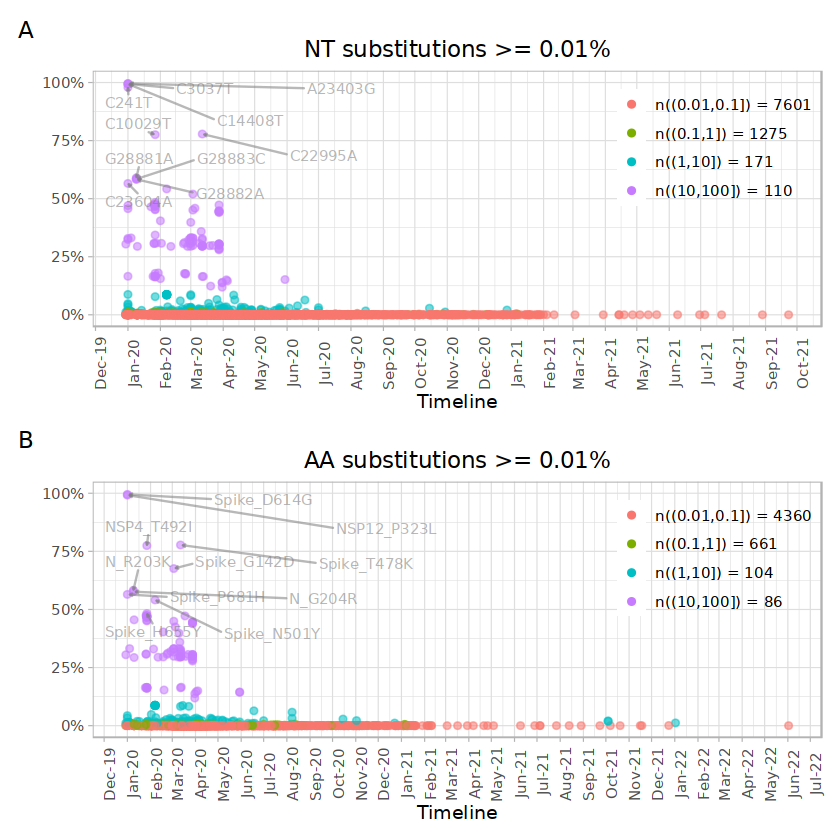

In [11]:
p.fig <- p.scatterNT / p.scatterAA +
    plot_annotation(tag_levels = 'A')

p.fig

In [12]:
ggsave("./r_analysis/plots/figures/patchwork.supplementary_fig3.pdf", 
       plot = p.fig, 
       width = 8.5, 
       height = 10)

### old scatter AA

[1] "running..."


[1] "(0.01,1]" "(1,5]"    "(5,10]"   "(10,100]"

png 
  2

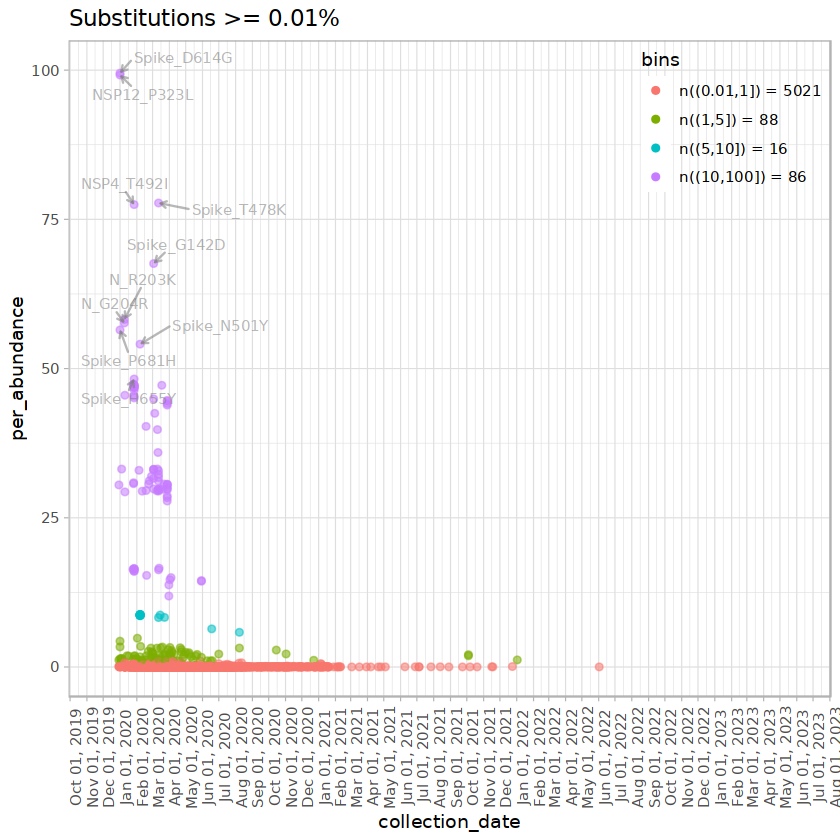

In [18]:
print("running...")
# reference: ggplot2.tidyverse.org/reference/labs.html

plotDF <- DF.subs.geqpt01
plotDF$bins <- cut(x = plotDF$per_abundance, breaks = c(0.01, 1, 5, 10, 100))

levels(plotDF$bins)

countDF <- plotDF %>%
    group_by(bins) %>%
    summarise(Count = n())

# A basic scatterplot with color depending on Species
p <- ggplot(plotDF, aes(x = collection_date, y = per_abundance, color = bins, alpha = 0.05)) + 
    geom_point() + # , colour = "black", pch = 21 # , size = 2
    theme_light() +
    ggtitle("Substitutions >= 0.01%") +
    scale_x_date(date_breaks = "1 month", 
                 date_labels = "%b %d, %Y",
                 limits = as.Date(c('2019-12-01','2023-05-31'))) +
#     scale_x_date(date_breaks = "1 week", date_labels =  "%b %d, %Y") +
    theme(axis.text.x = element_text(angle = 90)) +
    ggrepel::geom_text_repel(
        aes(label = aa_subs), 
        data = filter(plotDF, aa_subs %in% head(x = DF.subs.top100$aa_subs, n = 10)),
        # family = "Poppins",
        size = 3,
        min.segment.length = 0, 
        seed = 42, 
        box.padding = 0.5,
        max.overlaps = Inf,
        arrow = arrow(length = unit(0.010, "npc")),
        nudge_x = .15,
        nudge_y = .5,
        color = "grey50"
    ) +
    guides(colour = guide_legend(override.aes = list(alpha = 1)), alpha = "none") +
    scale_color_discrete(breaks = levels(countDF$bins), labels = paste0("n(", countDF$bins, ") = ", countDF$Count)) +
    theme(
        legend.position = c(1, 1),
        legend.justification = c("right", "top"),
        legend.box.just = "right",
        legend.margin = margin(6, 6, 6, 6),
        legend.background = element_rect(fill = "transparent") , #transparent legend bg
#         legend.box.background = element_rect(fill='transparent') #transparent legend panel
    )
p
ggsave("./r_analysis/plots/scatter01.pdf", plot = p, width = 10, height = 4)
pdf(file = "./r_analysis/plots/scatter01.pdf", width = 10, height = 4)
print(p)
dev.off()

## barplot (bins vs counts)

[1] "Dec-19 to Jan-20" "Jan-20 to Feb-20" "Feb-20 to Mar-20" "Mar-20 to Apr-20"
[5] "Apr-20 to Jul-20" "Jul-20 to Jan-21" "Jan-21 to May-23"

Saving 6.67 x 6.67 in image


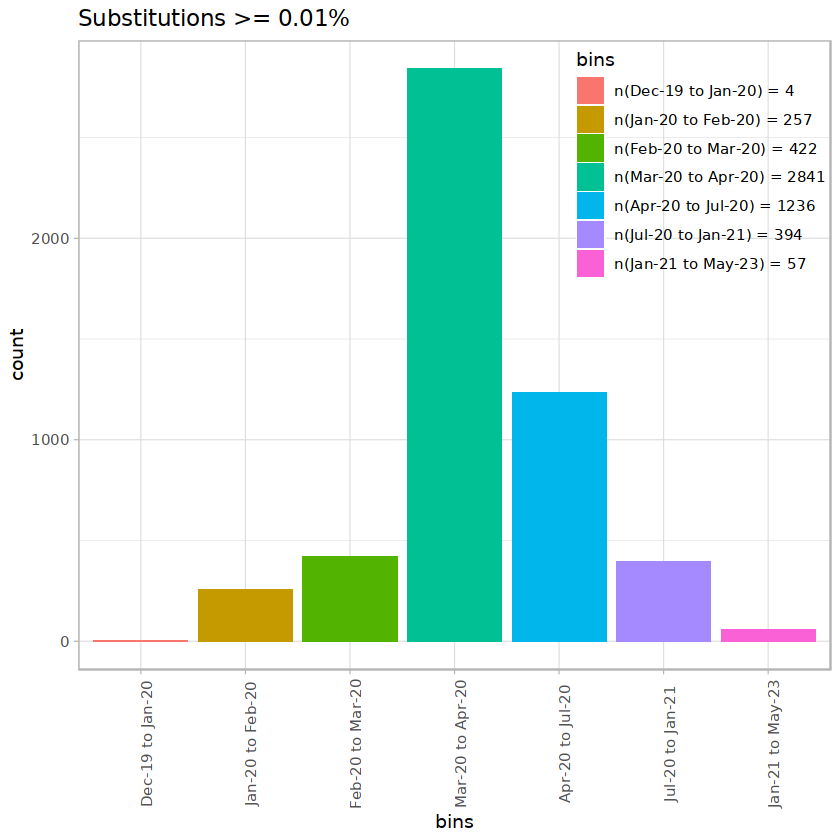

In [19]:
# >= 0.01%
plotDF <- DF.subs.geqpt01
plotDF$bins <- cut(
    x = plotDF$collection_date, 
    breaks = c(
        as_date("2019-12-01"), # Dec 19
        as_date("2020-01-01"),  # Jan 20
        as_date("2020-02-01"),  # Feb 20
        as_date("2020-03-01"),  # Mar 20
        as_date("2020-04-01"),  # Apr 20
        as_date("2020-07-01"),  # Jul 20
        as_date("2021-01-01"),  # Jan 21
        as_date("2023-05-25") # Last recorded date
    ),
    labels = c(
        "Dec-19 to Jan-20",
        "Jan-20 to Feb-20",
        "Feb-20 to Mar-20",
        "Mar-20 to Apr-20",
        "Apr-20 to Jul-20",
        "Jul-20 to Jan-21",
        "Jan-21 to May-23"
    )
)

levels(plotDF$bins)

# If you provide the argument stat=”identity” to geom_bar() then 
# you're telling R to calculate the sum of the y variable, grouped by 
# the x variable and use bars to display the sums.
plotDF <- mutate(plotDF, count = 1)
countDF <- plotDF %>%
    group_by(bins, .drop = F) %>%
    summarise(Count = n())
plotDF <- complete(plotDF, bins)

p <- ggplot(plotDF, aes(x = bins, y = count, fill = bins)) + 
    geom_bar(stat = "identity", na.rm = F) +
    theme_light() +
    ggtitle("Substitutions >= 0.01%") +
    theme(axis.text.x = element_text(angle = 90)) +
    guides(colour = guide_legend(override.aes = list(alpha = 1)), alpha = "none") +
    scale_fill_discrete(breaks = levels(countDF$bins), labels = paste0("n(", countDF$bins, ") = ", countDF$Count), drop = F) +
    theme(
        legend.position = c(1, 1),
        legend.justification = c("right", "top"),
        legend.box.just = "right",
        legend.margin = margin(6, 6, 6, 6),
        legend.background = element_rect(fill = "transparent") , #transparent legend bg
    )

p

ggsave("./r_analysis/plots/barplot01.geqpt01.pdf", plot = p)

[1] "Dec-19 to Jan-20" "Jan-20 to Feb-20" "Feb-20 to Mar-20" "Mar-20 to Apr-20"
[5] "Apr-20 to Jul-20" "Jul-20 to Jan-21" "Jan-21 to May-23"

Saving 6.67 x 6.67 in image


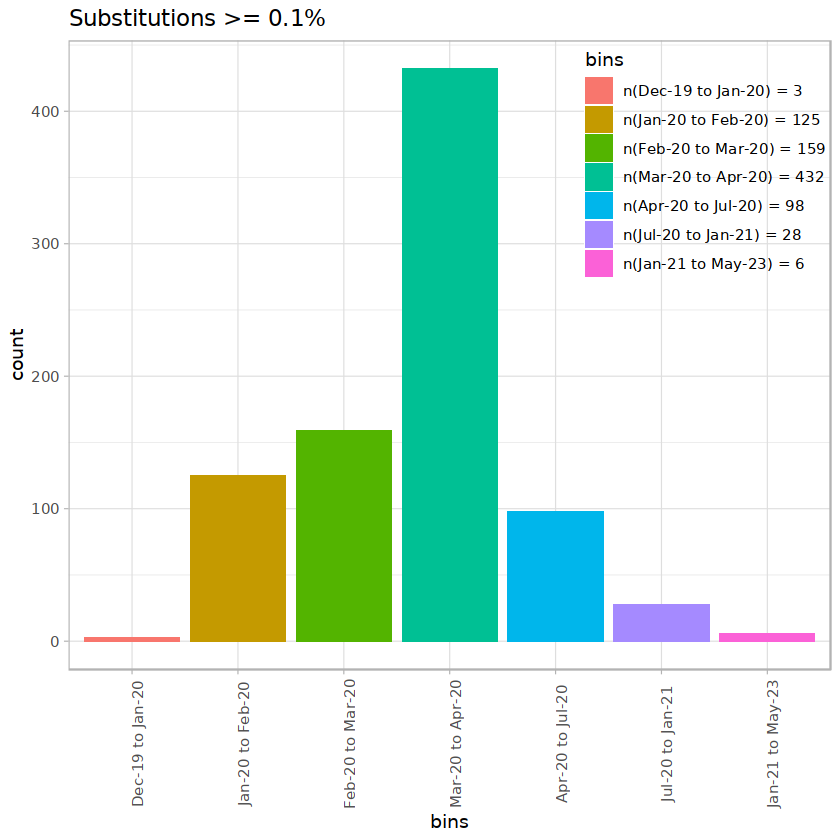

In [20]:
# >= 0.1%
plotDF <- DF.subs.geqpt1
plotDF$bins <- cut(
    x = plotDF$collection_date, 
    breaks = c(
        as_date("2019-12-01"), # Dec 19
        as_date("2020-01-01"),  # Jan 20
        as_date("2020-02-01"),  # Feb 20
        as_date("2020-03-01"),  # Mar 20
        as_date("2020-04-01"),  # Apr 20
        as_date("2020-07-01"),  # Jul 20
        as_date("2021-01-01"),  # Jan 21
        as_date("2023-05-25") # Last recorded date
    ),
    labels = c(
        "Dec-19 to Jan-20",
        "Jan-20 to Feb-20",
        "Feb-20 to Mar-20",
        "Mar-20 to Apr-20",
        "Apr-20 to Jul-20",
        "Jul-20 to Jan-21",
        "Jan-21 to May-23"
    )
)

levels(plotDF$bins)

# If you provide the argument stat=”identity” to geom_bar() then 
# you're telling R to calculate the sum of the y variable, grouped by 
# the x variable and use bars to display the sums.
plotDF <- mutate(plotDF, count = 1)
countDF <- plotDF %>%
    group_by(bins, .drop = F) %>%
    summarise(Count = n())
plotDF <- complete(plotDF, bins)

p <- ggplot(plotDF, aes(x = bins, y = count, fill = bins)) + 
    geom_bar(stat = "identity", na.rm = F) +
    theme_light() +
    ggtitle("Substitutions >= 0.1%") +
    theme(axis.text.x = element_text(angle = 90)) +
    guides(colour = guide_legend(override.aes = list(alpha = 1)), alpha = "none") +
    scale_fill_discrete(breaks = levels(countDF$bins), labels = paste0("n(", countDF$bins, ") = ", countDF$Count), drop = F) +
    theme(
        legend.position = c(1, 1),
        legend.justification = c("right", "top"),
        legend.box.just = "right",
        legend.margin = margin(6, 6, 6, 6),
        legend.background = element_rect(fill = "transparent") , #transparent legend bg
    )

p

ggsave("./r_analysis/plots/barplot01.geqpt1.pdf", plot = p)

[1] "Dec-19 to Jan-20" "Jan-20 to Feb-20" "Feb-20 to Mar-20" "Mar-20 to Apr-20"
[5] "Apr-20 to Jul-20" "Jul-20 to Jan-21" "Jan-21 to May-23"

Saving 6.67 x 6.67 in image


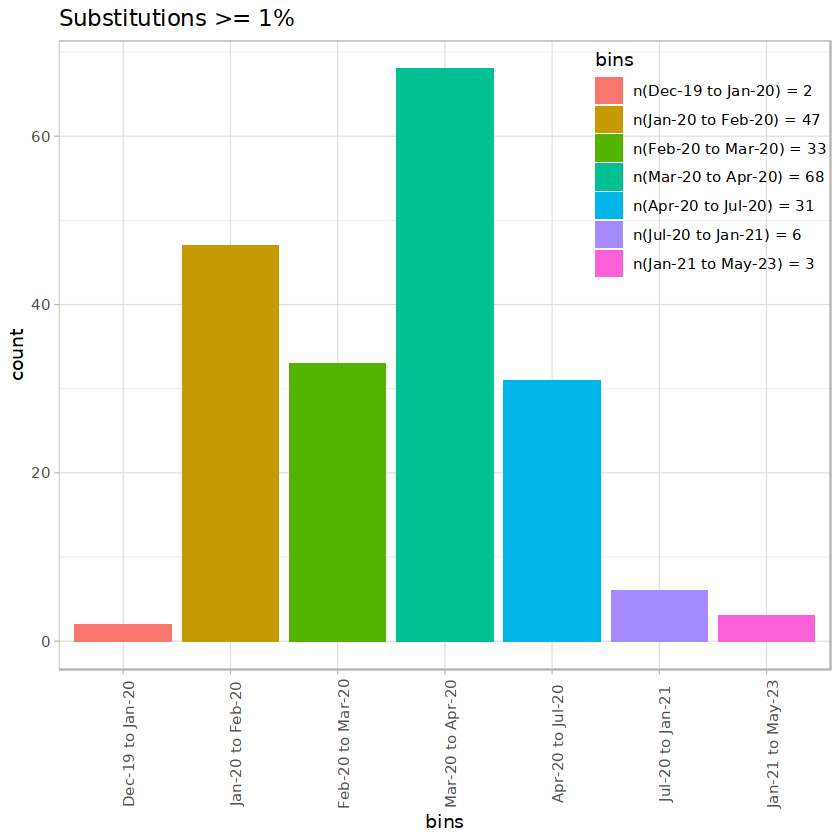

In [21]:
# >= 1%
plotDF <- DF.subs.geq1
plotDF$bins <- cut(
    x = plotDF$collection_date, 
    breaks = c(
        as_date("2019-12-01"), # Dec 19
        as_date("2020-01-01"),  # Jan 20
        as_date("2020-02-01"),  # Feb 20
        as_date("2020-03-01"),  # Mar 20
        as_date("2020-04-01"),  # Apr 20
        as_date("2020-07-01"),  # Jul 20
        as_date("2021-01-01"),  # Jan 21
        as_date("2023-05-25") # Last recorded date
    ),
    labels = c(
        "Dec-19 to Jan-20",
        "Jan-20 to Feb-20",
        "Feb-20 to Mar-20",
        "Mar-20 to Apr-20",
        "Apr-20 to Jul-20",
        "Jul-20 to Jan-21",
        "Jan-21 to May-23"
    )
)

levels(plotDF$bins)

# If you provide the argument stat=”identity” to geom_bar() then 
# you're telling R to calculate the sum of the y variable, grouped by 
# the x variable and use bars to display the sums.
plotDF <- mutate(plotDF, count = 1)
countDF <- plotDF %>%
    group_by(bins, .drop = F) %>%
    summarise(Count = n())
plotDF <- complete(plotDF, bins)

p <- ggplot(plotDF, aes(x = bins, y = count, fill = bins)) + 
    geom_bar(stat = "identity", na.rm = F) +
    theme_light() +
    ggtitle("Substitutions >= 1%") +
    theme(axis.text.x = element_text(angle = 90)) +
    guides(colour = guide_legend(override.aes = list(alpha = 1)), alpha = "none") +
    scale_fill_discrete(breaks = levels(countDF$bins), labels = paste0("n(", countDF$bins, ") = ", countDF$Count), drop = F) +
    theme(
        legend.position = c(1, 1),
        legend.justification = c("right", "top"),
        legend.box.just = "right",
        legend.margin = margin(6, 6, 6, 6),
        legend.background = element_rect(fill = "transparent") , #transparent legend bg
    )

p

ggsave("./r_analysis/plots/barplot01.geq1.pdf", plot = p)

[1] "Dec-19 to Jan-20" "Jan-20 to Feb-20" "Feb-20 to Mar-20" "Mar-20 to Apr-20"
[5] "Apr-20 to Jul-20" "Jul-20 to Jan-21" "Jan-21 to May-23"

Warning message:
"Removed 2 rows containing missing values (`position_stack()`)."
Saving 6.67 x 6.67 in image
Warning message:
"Removed 2 rows containing missing values (`position_stack()`)."


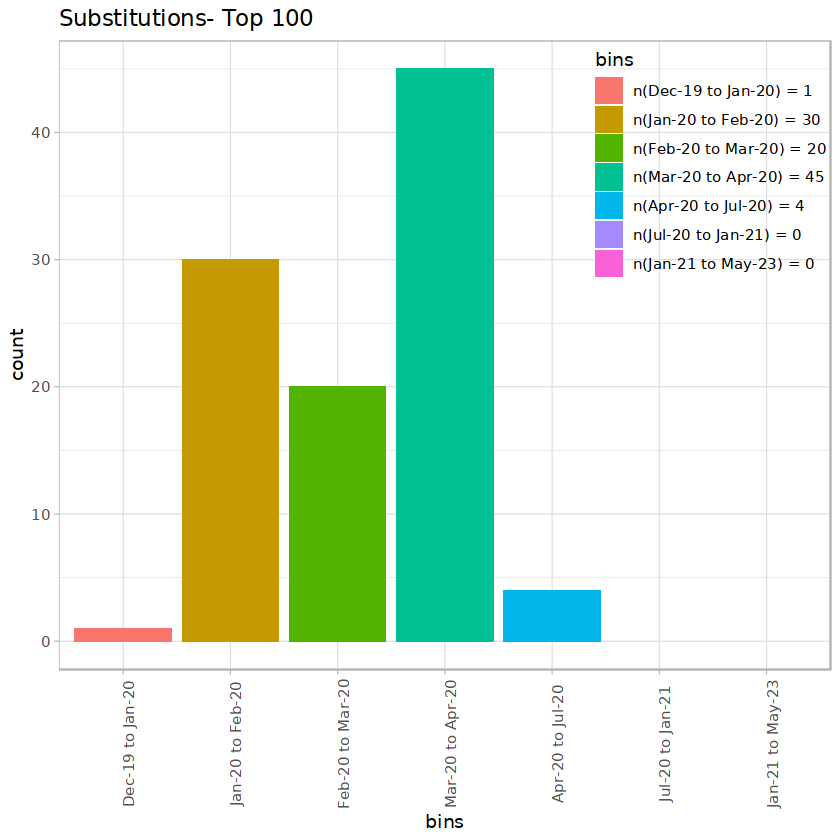

In [22]:
# top100
plotDF <- DF.subs.top100
plotDF$bins <- cut(
    x = plotDF$collection_date, 
    breaks = c(
        as_date("2019-12-01"), # Dec 19
        as_date("2020-01-01"),  # Jan 20
        as_date("2020-02-01"),  # Feb 20
        as_date("2020-03-01"),  # Mar 20
        as_date("2020-04-01"),  # Apr 20
        as_date("2020-07-01"),  # Jul 20
        as_date("2021-01-01"),  # Jan 21
        as_date("2023-05-25") # Last recorded date
    ),
    labels = c(
        "Dec-19 to Jan-20",
        "Jan-20 to Feb-20",
        "Feb-20 to Mar-20",
        "Mar-20 to Apr-20",
        "Apr-20 to Jul-20",
        "Jul-20 to Jan-21",
        "Jan-21 to May-23"
    )
)

levels(plotDF$bins)

# If you provide the argument stat=”identity” to geom_bar() then 
# you're telling R to calculate the sum of the y variable, grouped by 
# the x variable and use bars to display the sums.
plotDF <- mutate(plotDF, count = 1)
countDF <- plotDF %>%
    group_by(bins, .drop = F) %>%
    summarise(Count = n())
plotDF <- complete(plotDF, bins)

p <- ggplot(plotDF, aes(x = bins, y = count, fill = bins)) + 
    geom_bar(stat = "identity", na.rm = F) +
    theme_light() +
    ggtitle("Substitutions- Top 100") +
    theme(axis.text.x = element_text(angle = 90)) +
    guides(colour = guide_legend(override.aes = list(alpha = 1)), alpha = "none") +
    scale_fill_discrete(breaks = levels(countDF$bins), labels = paste0("n(", countDF$bins, ") = ", countDF$Count), drop = F) +
    theme(
        legend.position = c(1, 1),
        legend.justification = c("right", "top"),
        legend.box.just = "right",
        legend.margin = margin(6, 6, 6, 6),
        legend.background = element_rect(fill = "transparent") , #transparent legend bg
    )

p

ggsave("./r_analysis/plots/barplot01.top100.pdf", plot = p)

## lineplot (pos vs per_abundance)

[1] "NSP1"  "NSP2"  "NSP3"  "NS3"   "NSP4"  "NSP5"  "NSP6"  "NS6"   "NSP7" 
[10] "NS7a"  "NS7b"  "NSP8"  "NS8"   "NSP9"  "NSP10" "NSP11" "NSP12" "NSP13"
[19] "NSP14" "NSP15" "NSP16" "Spike" "E"     "M"     "N"

Saving 6.67 x 6.67 in image


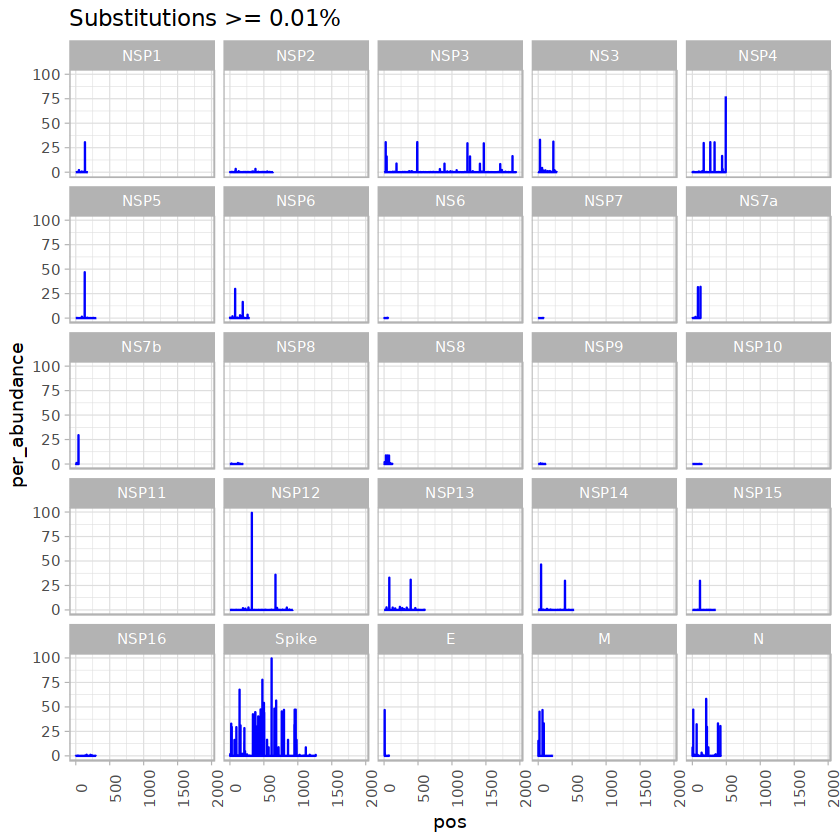

Saving 6.67 x 6.67 in image


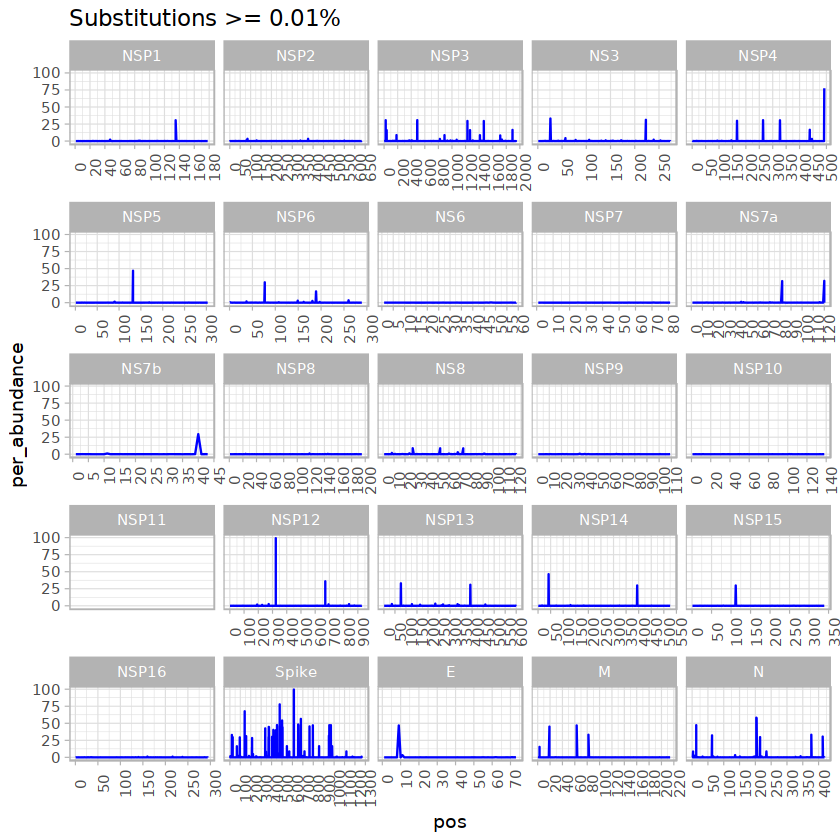

In [23]:
# >= 0.01%
plotDF <- DF.subs.geqpt01

# May need to club NSP3 with NS3, NSP7 with NS7a, NS7b, and so on- Ask sir
plotDF$region <- factor(
    plotDF$region, 
    levels = c(
        "NSP1",
        "NSP2",
        "NSP3",
        "NS3",
        "NSP4",
        "NSP5",
        "NSP6",
        "NS6",
        "NSP7",
        "NS7a",
        "NS7b",
        "NSP8",
        "NS8",
        "NSP9",
        "NSP10",
        "NSP11",
        "NSP12",
        "NSP13",
        "NSP14",
        "NSP15",
        "NSP16",
        "Spike",
        "E",
        "M",
        "N"
    )
)
levels(plotDF$region)

# Create a data frame with all positions from 1 to max position for each facet
plotDF.allPositions <- plotDF %>%
  group_by(region) %>%
  complete(pos = 1:max(pos)) %>%
  ungroup()

# Fill missing positions with 0
plotDF.allPositions <- plotDF.allPositions %>%
  replace_na(list(per_abundance = 0))


# Without pretty breaks
p <- ggplot(plotDF.allPositions, aes(pos, per_abundance)) + 
    theme_light() +
    geom_blank() +
    ggtitle("Substitutions >= 0.01%") +
    theme(axis.text.x = element_text(angle = 90)) +
    geom_line(color = "blue")
p <- p + facet_wrap(~region, drop = F) # , ncol = 3
p

ggsave("./r_analysis/plots/facetwrap01.autoDims.subsgeqpt01.pdf", plot = p)
ggsave("./r_analysis/plots/facetwrap01.subsgeqpt01.pdf", plot = p, width = 10, height = 5)

# With pretty breaks
p <- ggplot(plotDF.allPositions, aes(pos, per_abundance)) + 
  theme_light() +
  geom_blank() +
  ggtitle("Substitutions >= 0.01%") +
  theme(axis.text.x = element_text(angle = 90)) +
  geom_line(color = "blue") +
  facet_wrap(~region, drop = F, scales = "free_x") +
  scale_x_continuous(breaks = scales::pretty_breaks(n = 10))

p

ggsave("./r_analysis/plots/facetwrap01.autoDims.prettyBreaks.subs.geqpt01.pdf", plot = p)
ggsave("./r_analysis/plots/facetwrap01.prettyBreaks.subs.geqpt01.pdf", plot = p, width = 10, height = 8)

[1] "NSP1"  "NSP2"  "NSP3"  "NS3"   "NSP4"  "NSP5"  "NSP6"  "NS6"   "NSP7" 
[10] "NS7a"  "NS7b"  "NSP8"  "NS8"   "NSP9"  "NSP10" "NSP11" "NSP12" "NSP13"
[19] "NSP14" "NSP15" "NSP16" "Spike" "E"     "M"     "N"

Saving 6.67 x 6.67 in image


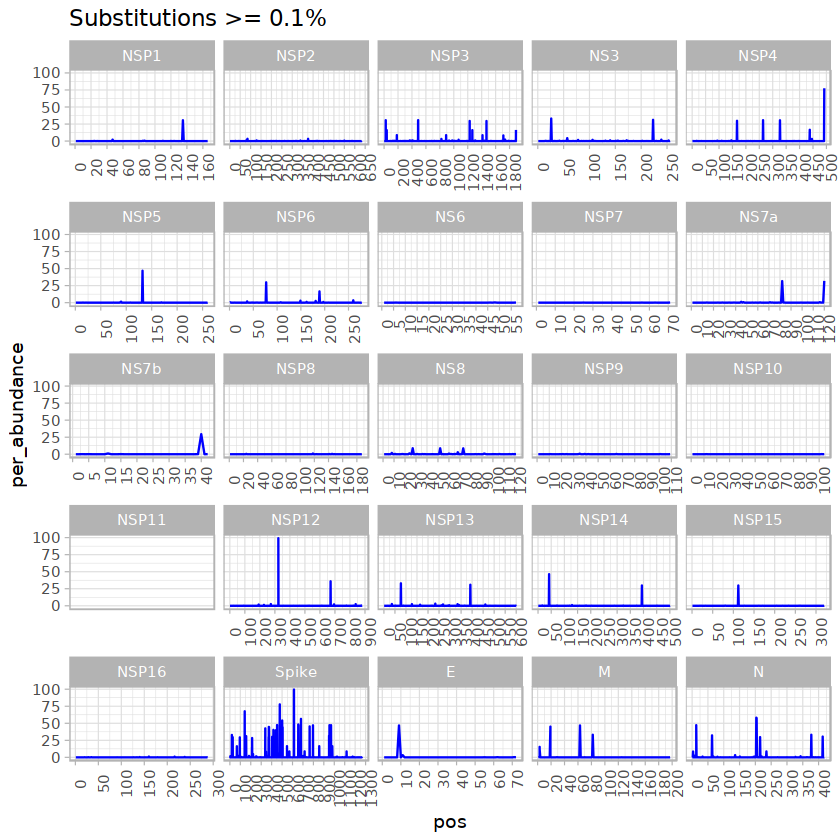

In [24]:
# >= 0.1%
plotDF <- DF.subs.geqpt1

# May need to club NSP3 with NS3, NSP7 with NS7a, NS7b, and so on- Ask sir
plotDF$region <- factor(
    plotDF$region, 
    levels = c(
        "NSP1",
        "NSP2",
        "NSP3",
        "NS3",
        "NSP4",
        "NSP5",
        "NSP6",
        "NS6",
        "NSP7",
        "NS7a",
        "NS7b",
        "NSP8",
        "NS8",
        "NSP9",
        "NSP10",
        "NSP11",
        "NSP12",
        "NSP13",
        "NSP14",
        "NSP15",
        "NSP16",
        "Spike",
        "E",
        "M",
        "N"
    )
)
levels(plotDF$region)

# Create a data frame with all positions from 1 to max position for each facet
plotDF.allPositions <- plotDF %>%
  group_by(region) %>%
  complete(pos = 1:max(pos)) %>%
  ungroup()

# Fill missing positions with 0
plotDF.allPositions <- plotDF.allPositions %>%
  replace_na(list(per_abundance = 0))

# With pretty breaks
p <- ggplot(plotDF.allPositions, aes(pos, per_abundance)) + 
  theme_light() +
  geom_blank() +
  ggtitle("Substitutions >= 0.1%") +
  theme(axis.text.x = element_text(angle = 90)) +
  geom_line(color = "blue") +
  facet_wrap(~region, drop = F, scales = "free_x") +
  scale_x_continuous(breaks = scales::pretty_breaks(n = 10))

p

ggsave("./r_analysis/plots/facetwrap01.autoDims.prettyBreaks.subs.geqpt1.pdf", plot = p)
ggsave("./r_analysis/plots/facetwrap01.prettyBreaks.subs.geqpt1.pdf", plot = p, width = 10, height = 8)

[1] "NSP1"  "NSP2"  "NSP3"  "NS3"   "NSP4"  "NSP5"  "NSP6"  "NS6"   "NSP7" 
[10] "NS7a"  "NS7b"  "NSP8"  "NS8"   "NSP9"  "NSP10" "NSP11" "NSP12" "NSP13"
[19] "NSP14" "NSP15" "NSP16" "Spike" "E"     "M"     "N"

Saving 6.67 x 6.67 in image


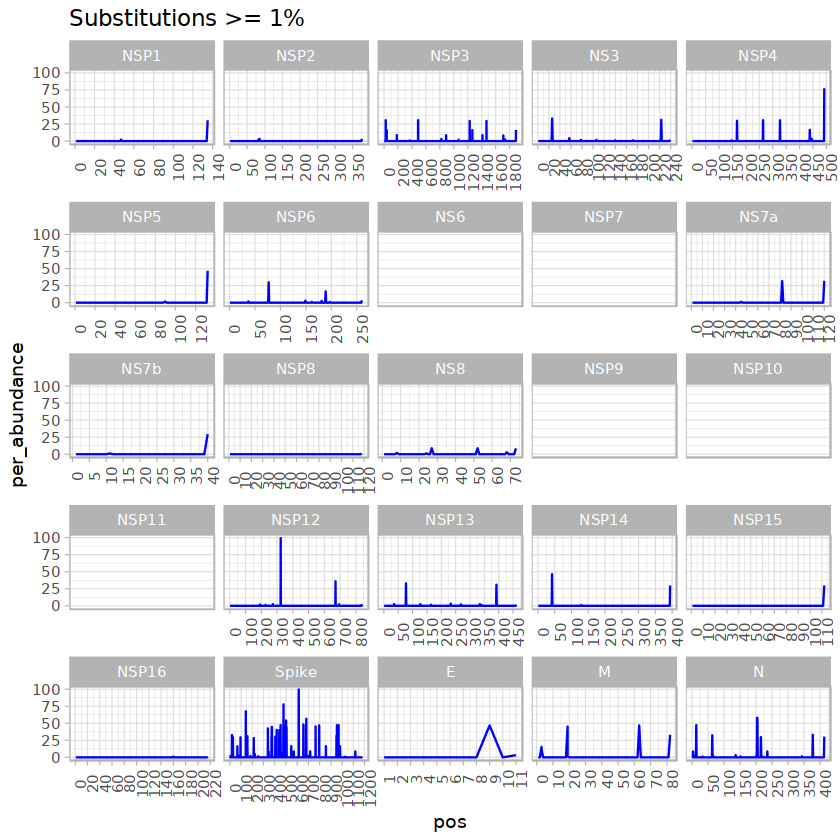

In [25]:
# >= 1%
plotDF <- DF.subs.geq1

# May need to club NSP3 with NS3, NSP7 with NS7a, NS7b, and so on- Ask sir
plotDF$region <- factor(
    plotDF$region, 
    levels = c(
        "NSP1",
        "NSP2",
        "NSP3",
        "NS3",
        "NSP4",
        "NSP5",
        "NSP6",
        "NS6",
        "NSP7",
        "NS7a",
        "NS7b",
        "NSP8",
        "NS8",
        "NSP9",
        "NSP10",
        "NSP11",
        "NSP12",
        "NSP13",
        "NSP14",
        "NSP15",
        "NSP16",
        "Spike",
        "E",
        "M",
        "N"
    )
)
levels(plotDF$region)

# Create a data frame with all positions from 1 to max position for each facet
plotDF.allPositions <- plotDF %>%
  group_by(region) %>%
  complete(pos = 1:max(pos)) %>%
  ungroup()

# Fill missing positions with 0
plotDF.allPositions <- plotDF.allPositions %>%
  replace_na(list(per_abundance = 0))

# With pretty breaks
p <- ggplot(plotDF.allPositions, aes(pos, per_abundance)) + 
  theme_light() +
  geom_blank() +
  ggtitle("Substitutions >= 1%") +
  theme(axis.text.x = element_text(angle = 90)) +
  geom_line(color = "blue") +
  facet_wrap(~region, drop = F, scales = "free_x") +
  scale_x_continuous(breaks = scales::pretty_breaks(n = 10))

p
ggsave("./r_analysis/plots/facetwrap01.autoDims.prettyBreaks.subs.geq1.pdf", plot = p)
ggsave("./r_analysis/plots/facetwrap01.prettyBreaks.subs.geq1.pdf", plot = p, width = 10, height = 8)

[1] "NSP1"  "NSP2"  "NSP3"  "NS3"   "NSP4"  "NSP5"  "NSP6"  "NS6"   "NSP7" 
[10] "NS7a"  "NS7b"  "NSP8"  "NS8"   "NSP9"  "NSP10" "NSP11" "NSP12" "NSP13"
[19] "NSP14" "NSP15" "NSP16" "Spike" "E"     "M"     "N"

Saving 6.67 x 6.67 in image


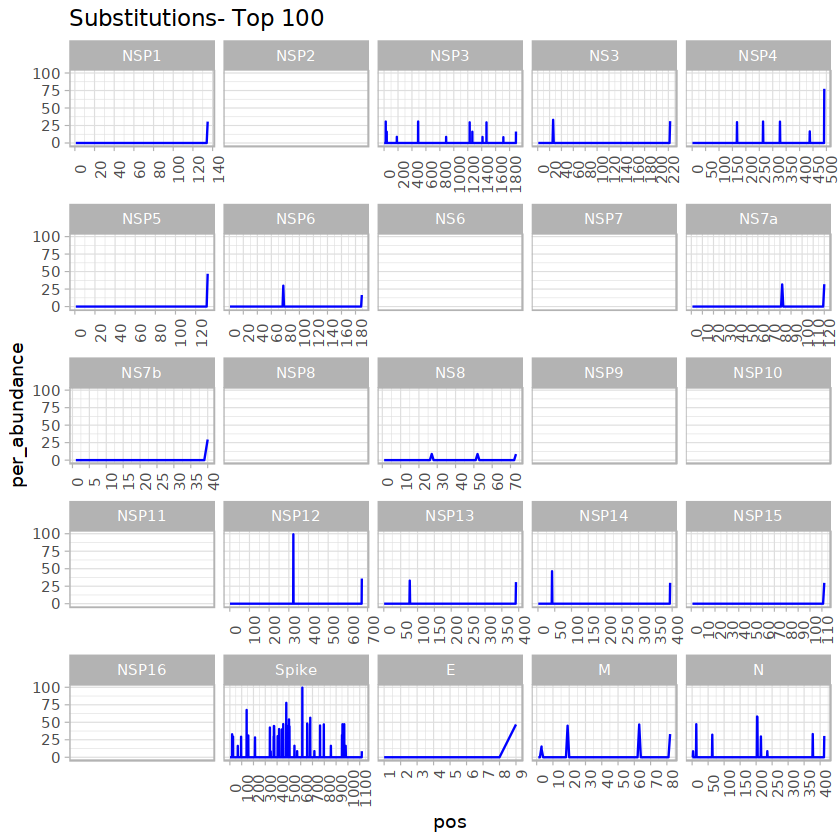

In [26]:
# Top 100
plotDF <- DF.subs.top100

# May need to club NSP3 with NS3, NSP7 with NS7a, NS7b, and so on- Ask sir
plotDF$region <- factor(
    plotDF$region, 
    levels = c(
        "NSP1",
        "NSP2",
        "NSP3",
        "NS3",
        "NSP4",
        "NSP5",
        "NSP6",
        "NS6",
        "NSP7",
        "NS7a",
        "NS7b",
        "NSP8",
        "NS8",
        "NSP9",
        "NSP10",
        "NSP11",
        "NSP12",
        "NSP13",
        "NSP14",
        "NSP15",
        "NSP16",
        "Spike",
        "E",
        "M",
        "N"
    )
)
levels(plotDF$region)

# Create a data frame with all positions from 1 to max position for each facet
plotDF.allPositions <- plotDF %>%
  group_by(region) %>%
  complete(pos = 1:max(pos)) %>%
  ungroup()

# Fill missing positions with 0
plotDF.allPositions <- plotDF.allPositions %>%
  replace_na(list(per_abundance = 0))

# With pretty breaks
p <- ggplot(plotDF.allPositions, aes(pos, per_abundance)) + 
  theme_light() +
  geom_blank() +
  ggtitle("Substitutions- Top 100") +
  theme(axis.text.x = element_text(angle = 90)) +
  geom_line(color = "blue") +
  facet_wrap(~region, drop = F, scales = "free_x") +
  scale_x_continuous(breaks = scales::pretty_breaks(n = 10))

p
ggsave("./r_analysis/plots/facetwrap01.autoDims.prettyBreaks.subs.top100.pdf", plot = p)
ggsave("./r_analysis/plots/facetwrap01.prettyBreaks.subs.top100.pdf", plot = p, width = 10, height = 8)

In [27]:
# # Saving Location wise count tables

# Type 1: based on <continent, country, state, city>
write.csv(DF.subs |> count(continent, country, state, city, sort = T), "./r_analysis/csv_files/locationCount.DF.subs.csv")
write.csv(DF.subs.geqpt01 |> count(continent, country, state, city, sort = T), "./r_analysis/csv_files/locationCount.DF.subs.geqpt01.csv")
write.csv(DF.subs.geqpt1 |> count(continent, country, state, city, sort = T), "./r_analysis/csv_files/locationCount.DF.subs.geqpt1.csv")
write.csv(DF.subs.geq1 |> count(continent, country, state, city, sort = T), "./r_analysis/csv_files/locationCount.DF.subs.geq1.csv")
write.csv(DF.subs.top100 |> count(continent, country, state, city, sort = T), "./r_analysis/csv_files/locationCount.DF.subs.top100.csv")

# Type 2: based on <continent, country, state>
write.csv(DF.subs |> count(continent, country, state, sort = T), "./r_analysis/csv_files/locationCount.DF.subs.noCity.csv")
write.csv(DF.subs.geqpt01 |> count(continent, country, state, sort = T), "./r_analysis/csv_files/locationCount.DF.subs.geqpt01.noCity.csv")
write.csv(DF.subs.geqpt1 |> count(continent, country, state, sort = T), "./r_analysis/csv_files/locationCount.DF.subs.geqpt1.noCity.csv")
write.csv(DF.subs.geq1 |> count(continent, country, state, sort = T), "./r_analysis/csv_files/locationCount.DF.subs.geq1.noCity.csv")
write.csv(DF.subs.top100 |> count(continent, country, state, sort = T), "./r_analysis/csv_files/locationCount.DF.subs.top100.noCity.csv")

# Type 3: based on <continent, country>
write.csv(DF.subs |> count(continent, country, sort = T), "./r_analysis/csv_files/locationCount.DF.subs.noState.csv")
write.csv(DF.subs.geqpt01 |> count(continent, country, sort = T), "./r_analysis/csv_files/locationCount.DF.subs.geqpt01.noState.csv")
write.csv(DF.subs.geqpt1 |> count(continent, country, sort = T), "./r_analysis/csv_files/locationCount.DF.subs.geqpt1.noState.csv")
write.csv(DF.subs.geq1 |> count(continent, country, sort = T), "./r_analysis/csv_files/locationCount.DF.subs.geq1.noState.csv")
write.csv(DF.subs.top100 |> count(continent, country, sort = T), "./r_analysis/csv_files/locationCount.DF.subs.top100.noState.csv")